1. BubbleSort : its like a bubbble that goes from start to end for n times. You place an i at 1 position in the array then check if A[i] < A[i-1] if yes then swap or no move right repeat this going from i=1 to n for n times giving time complexity of O(n^2) but as this is inplace sorting it is O(1) space complexity.

In [1]:
# Bubble Sort
# Time: O(n^2)
# Space: O(1)

A = [-5, 3, 2, 1, -3, -3, 7, 2, 2]

def bubble_sort(arr):
  n = len(arr)
  flag = True
  while flag:
    flag = False
    for i in range(1, n):
      if arr[i-1] > arr[i]:                     # iF you do < then it will sort in descending
        flag = True
        arr[i-1], arr[i] = arr[i], arr[i-1]

bubble_sort(A)
A

[-5, -3, -3, 1, 2, 2, 2, 3, 7]

2.Insertion Sort : Here again you start at i = 1 with two pointers i and j. i moves forward ie right one step at a time and j moves backwards each time i moves. It is said that the right side of i is unsorted region and left side is sorted region. Mtlb left side mein hr baar sort karo array ko jaise jaise i aage jayega.

In [2]:
# Insertion Sort
# Time: O(n^2)
# Space: O(1)

B = [-5, 3, 2, 1, -3, -3, 7, 2, 2]

def insertion_sort(arr):
  n = len(arr)
  for i in range(1, n):
    for j in range(i, 0, -1):
      if arr[j-1] > arr[j]:
        arr[j-1], arr[j] = arr[j], arr[j-1]
      else:
        # It means chize sorted hai
        break

insertion_sort(B)
B

[-5, -3, -3, 1, 2, 2, 2, 3, 7]

3.Selection Sort : So this one is the most intuitive to get. You have two pointers i and j you keep i at begining and move j till end to find the minimum in the entire array then swap i with min. Again now at i=2 find min by moving j from i+1 to n. Then i=3,4,5....

In [1]:
# Selection Sort
# Time: O(n^2)
# Space: O(1)

C = [-3, 3, 2, 1, -5, -3, 7, 2, 2]

def selection_sort(arr):
  n = len(arr)
  for i in range(n):
    min_index = i
    for j in range(i+1, n):
      if arr[j] < arr[min_index]:
        min_index = j
    arr[i], arr[min_index] = arr[min_index], arr[i]

selection_sort(C)
C

[-5, -3, -3, 1, 2, 2, 2, 3, 7]

4.Merge Sort : It is a recurssive algorithm. Here we use the strategy of divide and conquer by which we first take the middle of the array as len(array) // 2. Then keep dividing it till we get a base case ie individual elements. Now you can merge these elements into a sorted one and this step is conquering. Basically you build a recursive call stack whose height will give u the space complexity ie logn and at each step you have to combine n different elements which gives rise to time complexity of O(nlogn).
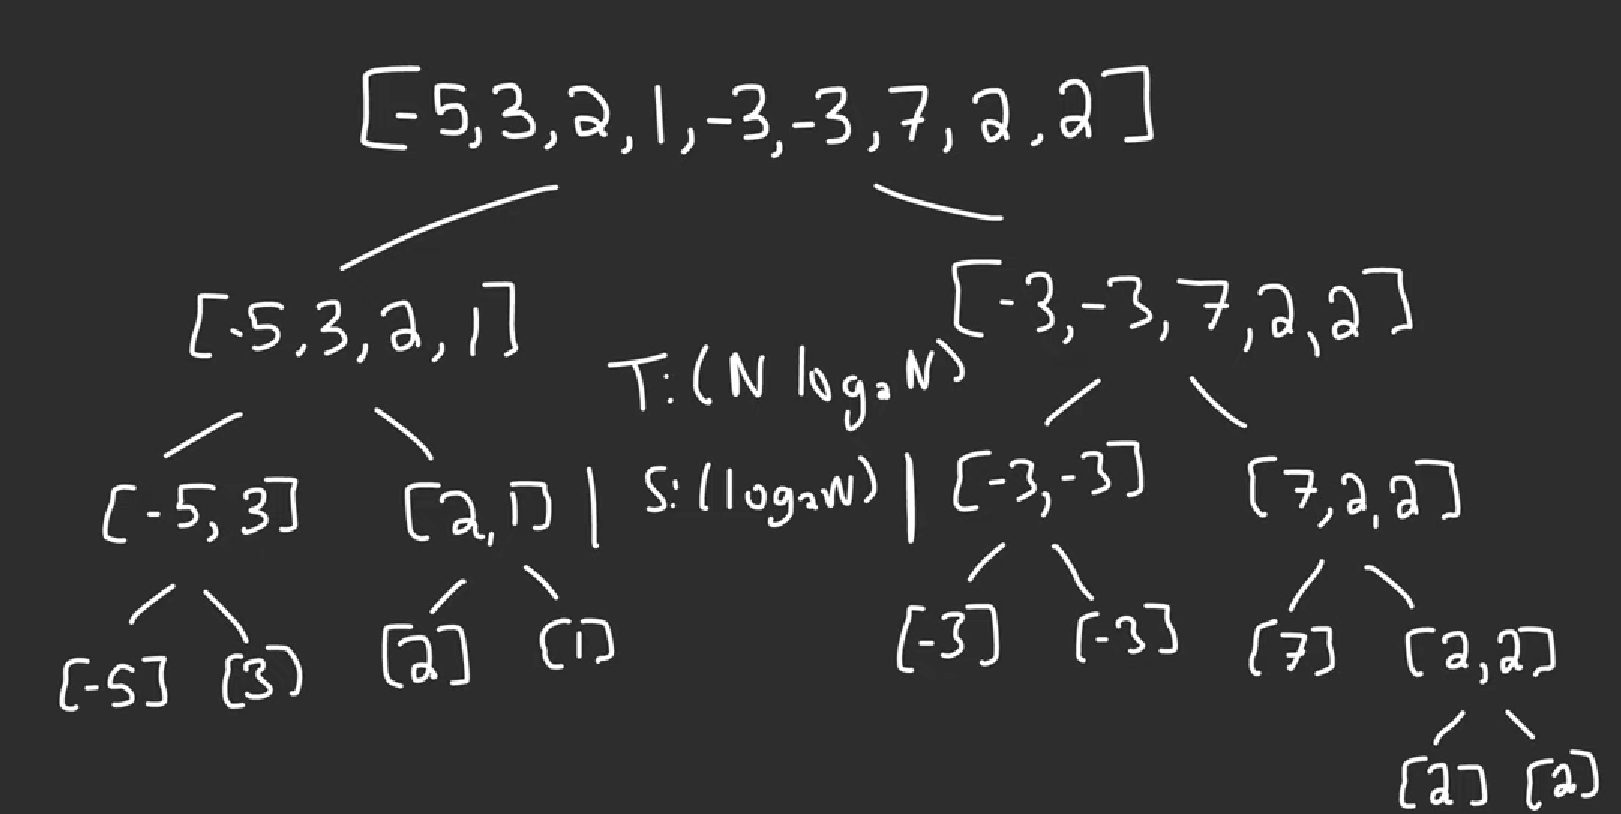

In [3]:
# Its okiee if you don't understand it but try to get the rough idea at least 
# Merge Sort
# Time: O(n log n)
# Space: O(n) - Note: can be Log n, but this is harder to write


D = [-5, 3, 2, 1, -3, -3, 7, 2, 2]

def merge_sort(arr):
  n = len(arr)

  if n == 1:
    return arr

  m = len(arr) // 2
  L = arr[:m]
  R = arr[m:]

  L = merge_sort(L)
  R = merge_sort(R)
  l, r = 0, 0
  L_len = len(L)
  R_len = len(R)

  sorted_arr = [0] * n
  i = 0

  while l < L_len and r < R_len:
    if L[l] < R[r]:
      sorted_arr[i] = L[l]
      l += 1
    else:
      sorted_arr[i] = R[r]
      r += 1

    i += 1

  while l < L_len:
    sorted_arr[i] = L[l]
    l += 1
    i += 1

  while r < R_len:
    sorted_arr[i] = R[r]
    r += 1
    i += 1

  return sorted_arr

merge_sort(D)
    

[-5, -3, -3, 1, 2, 2, 2, 3, 7]

5.Quick Sort : It is also a recursive algorithm. First you take a pivot usually the last element then you create three different arrays middle one would be the pivot itself left one would be elements less than pivot and right one would be elements greater than the pivot. Then you apply this same funda on the created arrays recursively. After getting either a single element in the array or an empty array (which is usually when you choose a bad pivot) you just merge them as they are already sorted by this time.
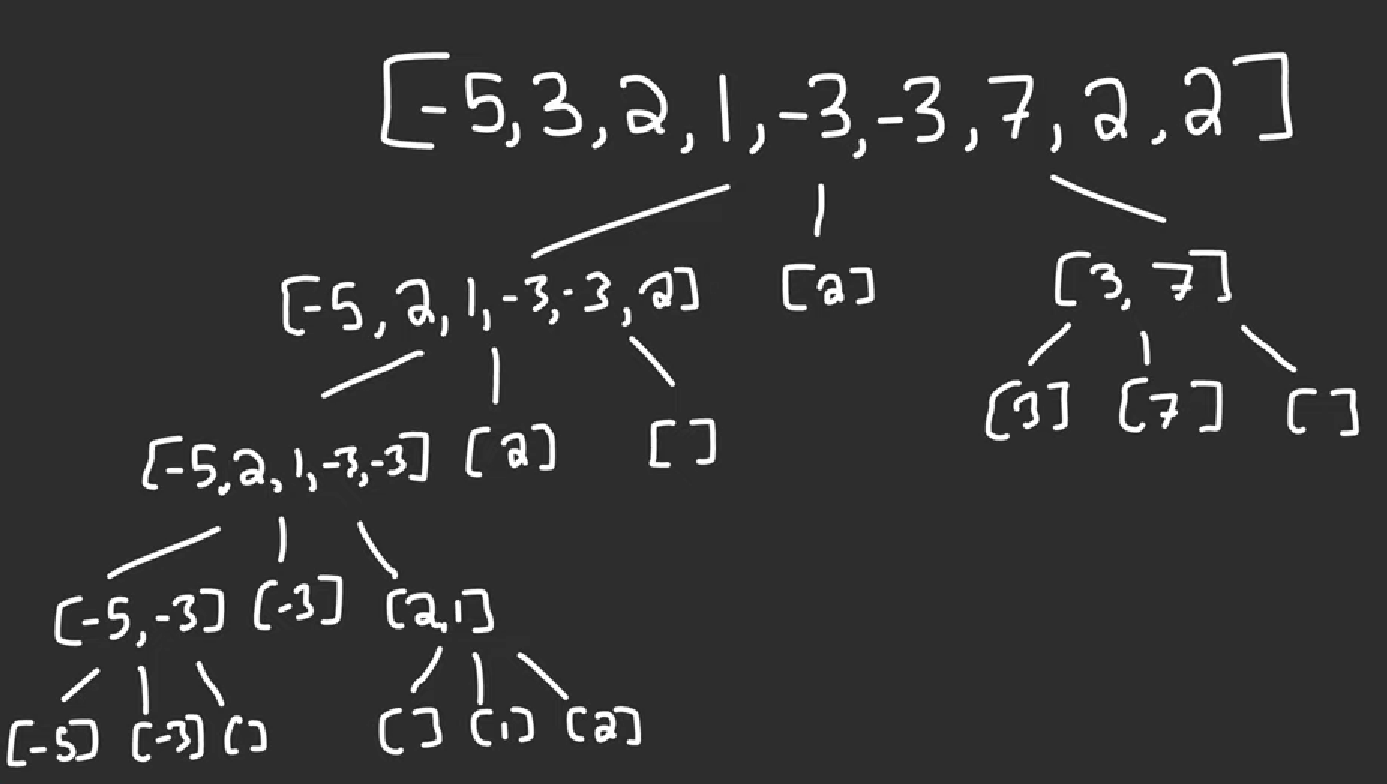

Now the space complexity of this is O(logn) but we will code a O(n) as it is easier but the tricker part of quick sort is its time complexity which is O(nlogn) in general case but if we keep choosing bad pivot on worst case it might just go to O(n^2).

In [4]:
# Quick Sort
# Time: O(n log n) (Average case, technically Worst case is O(n^2))
# Space: O(n)

E = [-5, 3, 2, 1, -3, -3, 7, 2, 2]

def quick_sort(arr):
  if len(arr) <= 1:
    return arr

  p = arr[-1]

  L = [x for x in arr[:-1] if x <= p]
  R = [x for x in arr[:-1] if x > p]

  L = quick_sort(L)
  R = quick_sort(R)

  return L + [p] + R

quick_sort(E)

[-5, -3, -3, 1, 2, 2, 2, 3, 7]

6.Counting Sort : This sorting algorithm is mostly seen in leetcode problems. First you go through the array and find the maximum value. Now the reason we calculated this max is bcz now we will create another array with size max+1 why we do that? bcz now in this array we are going to count how many times there is 3, how many times is 6 etc. How we do that? we send the i from first to last in the array. Now after making this count array you will take a c from start to end in this array and for each element suppose 2 3's then for that position in i put 2 3's one by one.
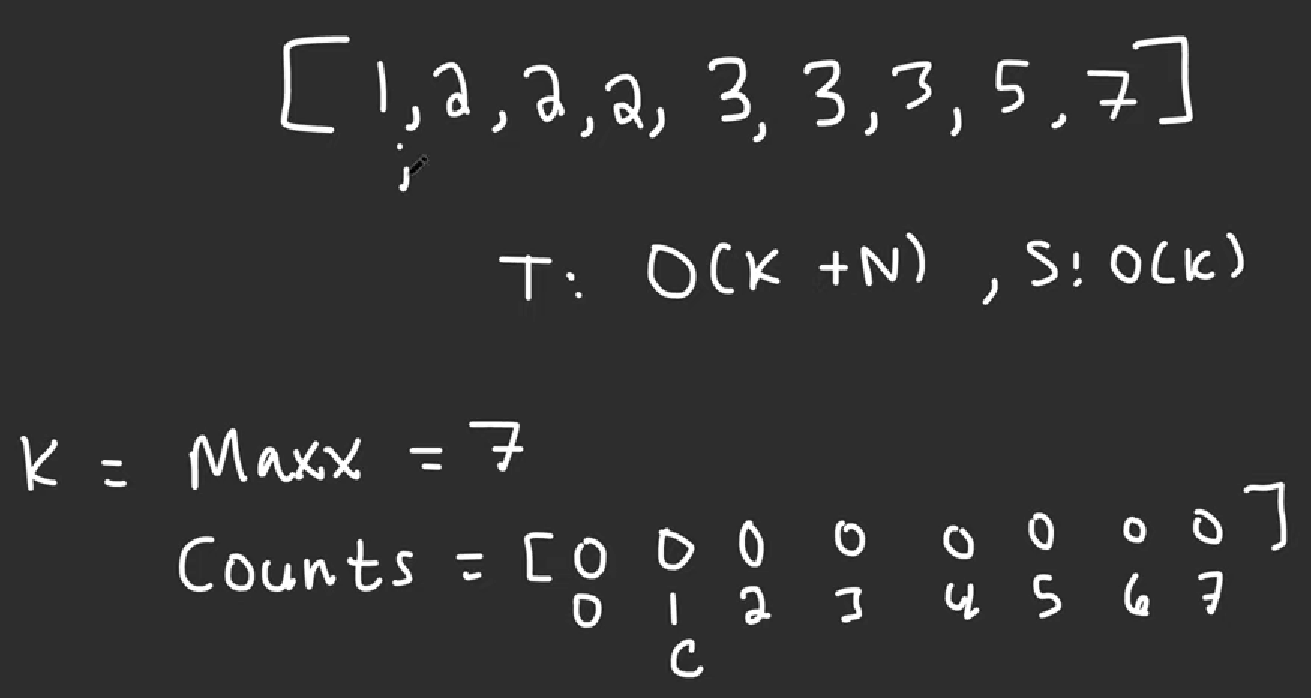

As you can see this is very profound in cs that if k is small we might just have a linear space time complexity sorting algorithm which is great.

In [5]:
# Counting Sort
# Time: O(n + k) where k is the range of data

# Note - This can be written with negative arrays, but we'll stick to positive arrays,
# so k is the max of the array

# Space: O(k)

F = [5, 3, 2, 1, 3, 3, 7, 2, 2]

def counting_sort(arr):
  n = len(arr)
  maxx = max(arr)
  counts = [0] * (maxx + 1)

  for x in arr:
    counts[x] += 1

  i = 0
  for c in range(maxx + 1):
    while counts[c] > 0:
      arr[i] = c
      i += 1
      counts[c] -= 1

counting_sort(F)
F

[1, 2, 2, 2, 3, 3, 3, 5, 7]

But what do we usually do in real life ?
What we usually do in practice
Time complexity is O(n log n) from using Tim Sort
The cool thing is that this Algo is written specifically for python lang

In [6]:
G = [-5, 3, 2, 1, -3, -3, 7, 2, 2]

# In place (constant space)
G.sort()

G

[-5, -3, -3, 1, 2, 2, 2, 3, 7]

In [7]:
# Get new sorted array - O(n) space

H = [-5, 3, 2, 1, -3, -3, 7, 2, 2]

sorted_H = sorted(H)

H, sorted_H

([-5, 3, 2, 1, -3, -3, 7, 2, 2], [-5, -3, -3, 1, 2, 2, 2, 3, 7])

In [8]:
# Sort array of tuples

I = [(-5, 3), (2, 1), (-3, -3), (7, 2), (2, 2)]     # Common in index problems

sorted_I = sorted(I, key = lambda t: -t[1])  
# If you waana sort on the basis of 2nd value in tuple in descending order

sorted_I

[(-5, 3), (7, 2), (2, 2), (2, 1), (-3, -3)]